In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
raw_data.describe(include='all')
#DESCRIBING THE RAW DATA

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [10]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [13]:
#DEALING WITH MISSING VALUES
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [14]:
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


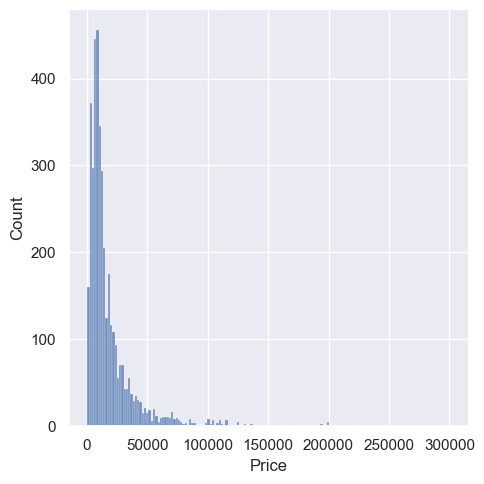

In [17]:
#TO PRINT NORMAL DISTRIBUTION OF ANY INTREST
sns.displot(data_no_mv['Price'])

In [ ]:
#SInce the above plot is exponential we will definitely have a problem in ploting the regression so we shoudl remove the top 1% of the observations
#also see the table tht you got from data_no_mv 

#And the above plot has outliers that is those are the observation that ly outside the other observation

In [18]:
#DEALING WITH OUTLINERS

q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


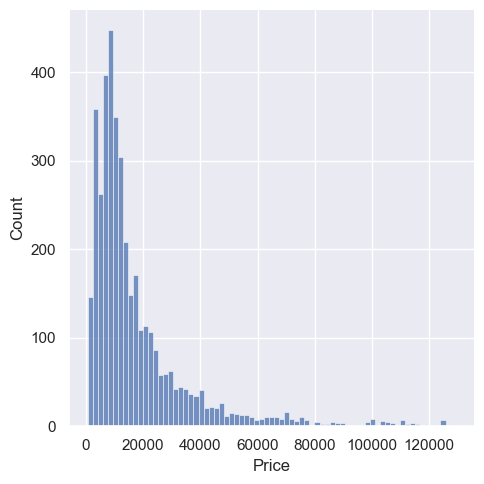

In [19]:
sns.displot(data_1['Price'])

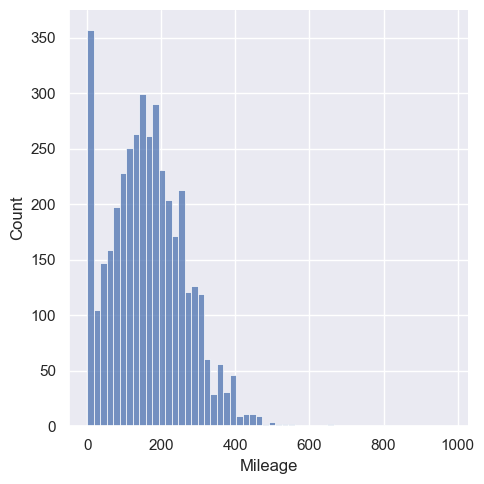

In [20]:
#SIMILAR TO MILEAGE

sns.displot(data_no_mv['Mileage'])

In [22]:
q2 = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_no_mv[data_no_mv['Mileage']<q2]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1516,NaN,NaN,1833,3616,NaN
mean,NaN,19668.596878,NaN,159.892570,2.768489,NaN,NaN,2006.479669
std,NaN,25893.860852,NaN,96.633975,4.960538,NaN,NaN,6.616733
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21962.250000,NaN,227.000000,3.000000,NaN,NaN,2012.000000


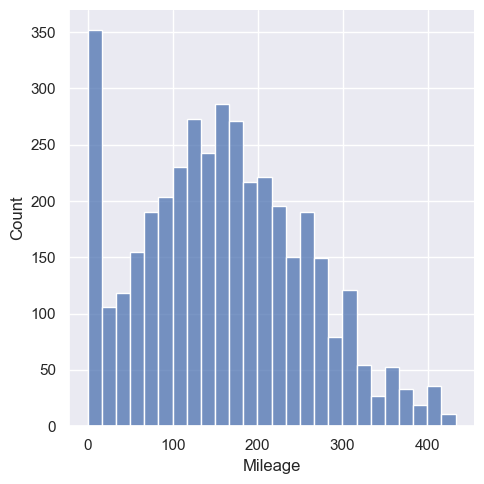

In [23]:
sns.displot(data_2['Mileage'])

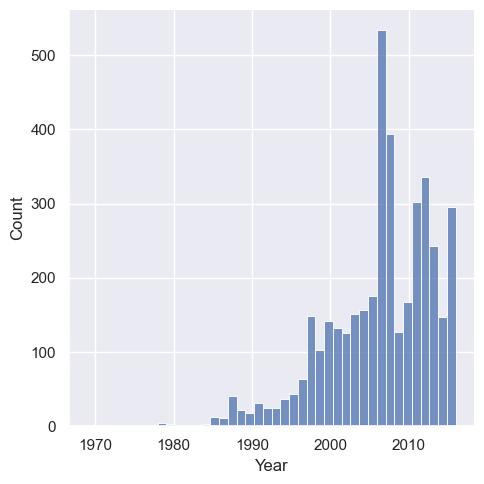

In [24]:
sns.displot(data_no_mv['Year'])

In [ ]:
#in this case the outliners are the first and hence well keep the pern=centile at 0.01


In [25]:
q4 = data_no_mv['Year'].quantile(0.01)
data_3 = data_no_mv[data_no_mv['Year']<q4]
data_3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,38,38.000000,38,38.000000,38.000000,38,38,38.000000
unique,7,NaN,6,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,14,NaN,25,NaN,NaN,19,38,NaN
mean,NaN,3659.032895,NaN,203.052632,2.000000,NaN,NaN,1983.368421
std,NaN,5505.325243,NaN,131.124852,0.509372,NaN,NaN,3.552092
min,NaN,600.000000,NaN,1.000000,1.100000,NaN,NaN,1969.000000
25%,NaN,1850.625000,NaN,110.500000,1.600000,NaN,NaN,1982.250000
50%,NaN,2350.000000,NaN,215.000000,2.000000,NaN,NaN,1985.000000
75%,NaN,3425.000000,NaN,297.500000,2.300000,NaN,NaN,1986.000000


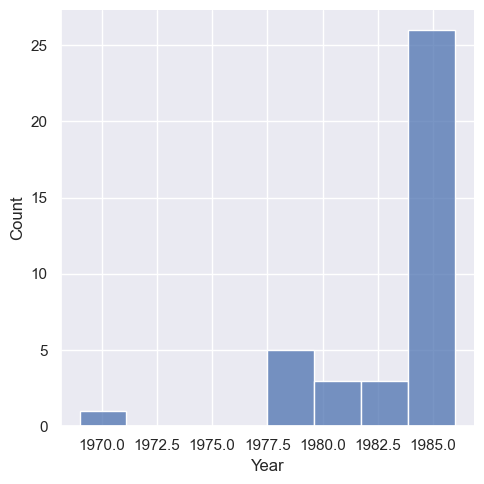

In [26]:
sns.displot(data_3['Year'])

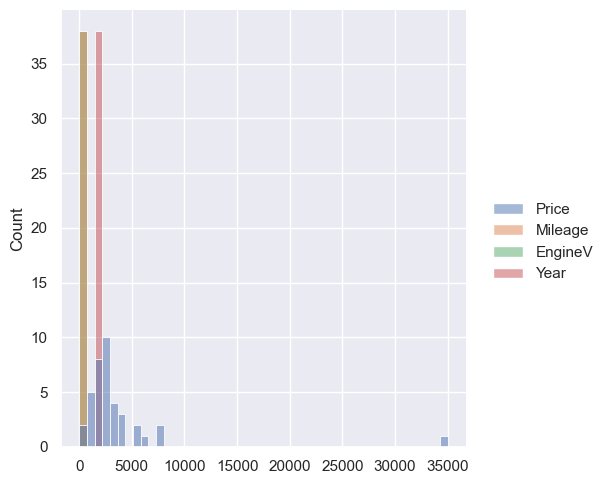

In [27]:
sns.displot(data_3)

In [30]:
#.reset_index resets the index and gives the only wanted 
#TO CLEAN THE WHOLE TABLE AND DISPLAY

data_cleaned = data_3.reset_index(drop = True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,38,38.000000,38,38.000000,38.000000,38,38,38.000000
unique,7,NaN,6,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,14,NaN,25,NaN,NaN,19,38,NaN
mean,NaN,3659.032895,NaN,203.052632,2.000000,NaN,NaN,1983.368421
std,NaN,5505.325243,NaN,131.124852,0.509372,NaN,NaN,3.552092
min,NaN,600.000000,NaN,1.000000,1.100000,NaN,NaN,1969.000000
25%,NaN,1850.625000,NaN,110.500000,1.600000,NaN,NaN,1982.250000
50%,NaN,2350.000000,NaN,215.000000,2.000000,NaN,NaN,1985.000000
75%,NaN,3425.000000,NaN,297.500000,2.300000,NaN,NaN,1986.000000


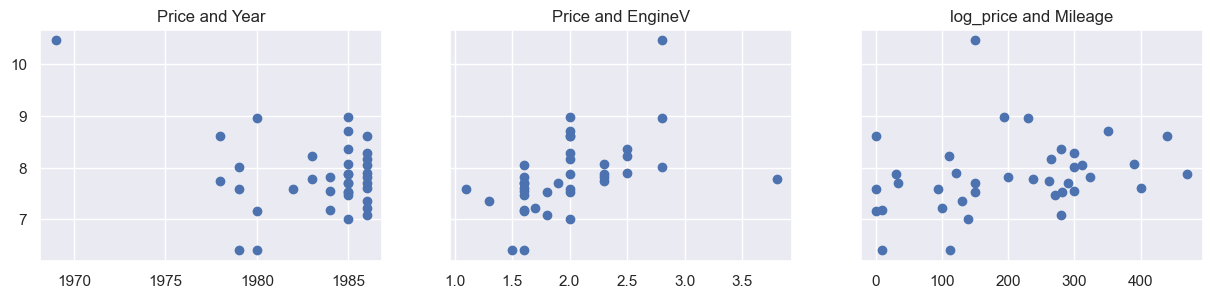

In [35]:
#To PRINT LINEARREGRESSION for price mileage and engine

log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned


f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

In [36]:
# well drop the original price variable or the feature since it is not needed

data_cleaned = data_cleaned.drop(['Price'],axis = 1)

In [37]:
# MULTICOLLINEARITY CALCULATION

data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [ ]:
# sklearn doesnt support multicollineaity asnd hence we use VIF method 
# VIF method is how much larger sqyare root of the estimated error is

In [39]:
# CREATING DUMMIES
data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)

data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first = True)
data_with_dummies.describe()


,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Petrol
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,203.052632,2.000000,7.841436,0.131579,0.368421,0.052632,0.026316,0.078947,0.236842,0.157895,0.105263,0.657895,0.026316,0.026316,0.236842,0.500000
std,131.124852,0.509372,0.733707,0.342570,0.488852,0.226294,0.162221,0.273276,0.430851,0.369537,0.311012,0.480783,0.162221,0.162221,0.430851,0.506712
min,1.000000,1.100000,6.396930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.500000,1.600000,7.523279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,215.000000,2.000000,7.761944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000
75%,297.500000,2.300000,8.138115,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,470.000000,3.800000,10.463075,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Petrol'], dtype=object)

In [42]:
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Petrol']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Petrol
0,112,1.6,6.396930,0,0,0,0,0,0,0,0,1,0,0,0,1
1,10,1.5,6.396930,0,0,0,0,1,0,0,0,1,0,0,0,1
2,265,2.0,8.160518,0,0,0,0,0,0,0,0,1,0,0,0,0
3,470,2.0,7.882315,0,1,0,0,0,0,0,0,1,0,0,1,0
4,121,2.5,7.901007,0,1,0,0,0,0,0,0,1,0,0,0,0


In [48]:
### LINEAR REGRESSION MODEL

targets = data_preprocessed['log_price']
inputs = data_preprocessed(['log_price'],axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
                           
                           

TypeError: 'DataFrame' object is not callable

In [49]:
### THE LINEAR REGRRESSIKON MODEL CODE IN BOOK
